# Assignment 6.1

Name: Parker Christenson  

Date: 10/13/2023


For this assignment, you will refer to the textbook to solve the practice exercises. **Use Python to answer any coding problems (not R, even if indicated in your textbook).** Use Jupyter Notebook, Google Colab, or a similar software program to complete your assignment. Submit your answers as a **PDF or HTML** file. As a best practice, always label your axes and provide titles for any graphs generated on this assignment. Round all quantitative answers to 2 decimal places.

## Problem 6.1.

For the Scottish hill `Races` data, a linear model can predict men’s record times from women’s record times.  
http://stat4ds.rwth-aachen.de/data/ScotsRaces.dat


(a)  Show the scatterplot and report the prediction equation. Predict the men’s record time for the Highland Fling, for which timeW = 490.05 minutes.


`Your answer goes here`

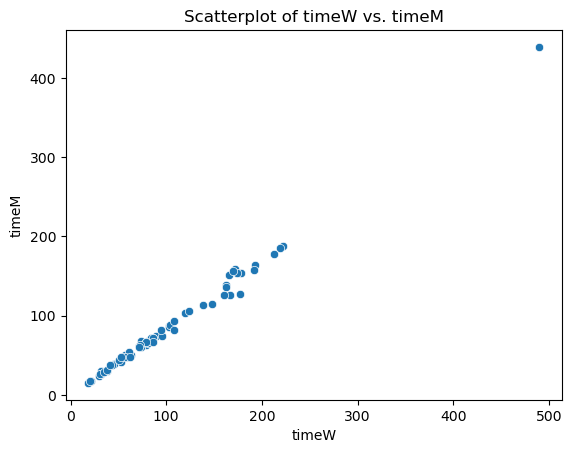

Prediction equation: timeM = -2.834 + 0.871 * timeW
Predicted timeM for timeW=490.05: 423.94 minutes


c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


race_data = pd.read_csv(r'Assignments\Assignment_6\Race_Data.csv')

# scatterplot
sns.scatterplot(data=race_data, x='timeW', y='timeM')
plt.title('Scatterplot of timeW vs. timeM')
plt.show()

# linear regression
X = race_data[['timeW']] # Feature matrix (2D)
y = race_data['timeM']   # Target vector
model = LinearRegression().fit(X, y)

# prediction equation
slope = model.coef_[0]
intercept = model.intercept_
print(f"Prediction equation: timeM = {intercept:.3f} + {slope:.3f} * timeW")

# men's record time for timeW = 490.05
predicted_timeM = model.predict(np.array([[490.05]]))[0]
print(f"Predicted timeM for timeW=490.05: {predicted_timeM:.2f} minutes")

(b) Find and interpret the correlation.

`Your answer goes here`

In [2]:
# correlation
correlation = race_data['timeW'].corr(race_data['timeM'])

print(f"The correlation between timeW and timeM is: {correlation:.3f}")

# Simple Interpretation
if correlation > 0:
    print("This indicates a positive relationship between timeW and timeM.")
else:
    print("This indicates a negative relationship between timeW and timeM.")


The correlation between timeW and timeM is: 0.996
This indicates a positive relationship between timeW and timeM.


(c) We could impose the natural constraint that when timeW = 0, then timeM = 0. Fit the model $E(Y_i)=\beta x_i.$ Interpret the estimated slope.

`Your answer goes here`

In [3]:
X = race_data[['timeW']]
y = race_data['timeM']

# Fitting linear regression without intercept
model_no_intercept = LinearRegression(fit_intercept=False).fit(X, y)

# Getting the slope (beta)
slope = model_no_intercept.coef_[0]

print(f"The estimated slope (beta) is: {slope:.3f}")

The estimated slope (beta) is: 0.852


## Problem 6.2.

For advanced industrialized nations, the Firearms data file at the text website shows annual homicide rates (per million population) and the number of firearms (per 100 people), with data taken from Wikipedia and [smallarmssurvey.org](smallarmssurvey.org).

(a) Construct a scatterplot and highlight any observations that fall apart from the general trend.

`Your answer goes here`

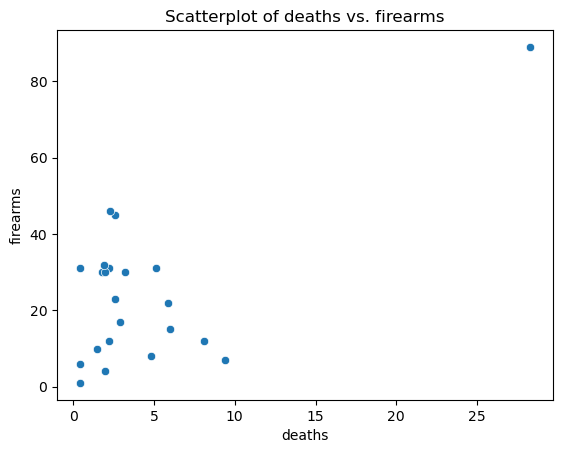

In [4]:
Firearms_Data = pd.read_csv(r'Assignments\Assignment_6\Firearms_Data.csv')

# scatter plot

sns.scatterplot(data=Firearms_Data, x='deaths', y='firearms')
plt.title('Scatterplot of deaths vs. firearms')
plt.show()

## Looking at the data and the csv file, we can see that the United States has a very high gun ownership rate and a very high gun death rate. With that being said the united states is the outlier in the data set

(b) Find the correlation with and without the outlying observation. Why is it so different in the two cases?

`Your answer goes here`

In [5]:
# correlation for the entire dataset
correlation_all = Firearms_Data['deaths'].corr(Firearms_Data['firearms'])
print(f"Correlation with all observations: {correlation_all:.3f}")

# filter out the US row
Firearms_Data_filtered = Firearms_Data[~((Firearms_Data['firearms'] > 60) & (Firearms_Data['deaths'] > 15))]

# correlation without the US row
correlation_filtered = Firearms_Data_filtered['deaths'].corr(Firearms_Data_filtered['firearms'])
print(f"Correlation without the outlier (US row): {correlation_filtered:.3f}")


Correlation with all observations: 0.634
Correlation without the outlier (US row): -0.175


(c) Fit the linear regression model with and without the outlying observation, and note how influential an outlier can be on the fit.

`Your answer goes here`

Linear regression with all observations:
Intercept: -0.273, Slope: 0.192


Linear regression without the outlier:
Intercept: 3.910, Slope: -0.033


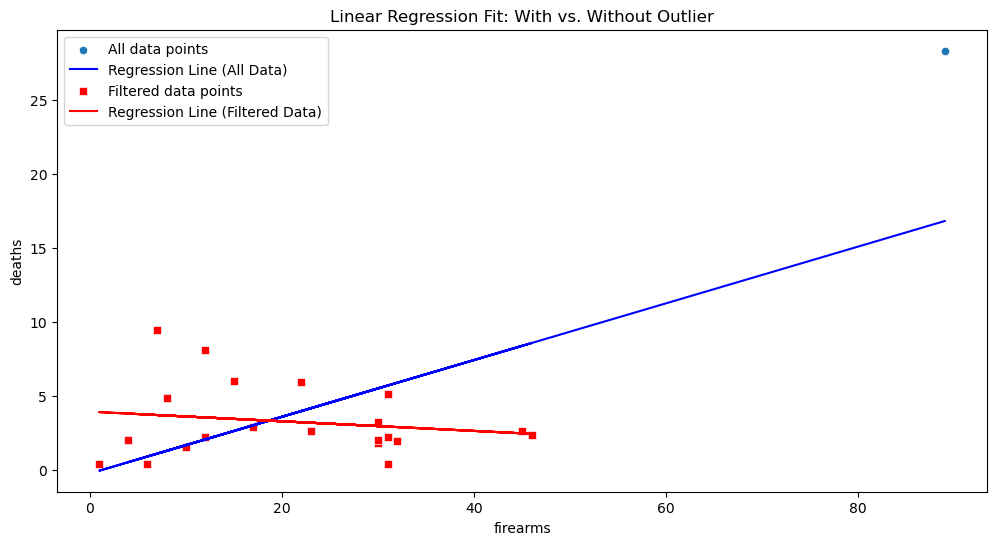

In [6]:
from sklearn.linear_model import LinearRegression

# data preparation
X_all = Firearms_Data[['firearms']]
y_all = Firearms_Data['deaths']

X_filtered = Firearms_Data_filtered[['firearms']]
y_filtered = Firearms_Data_filtered['deaths']

# fit the linear regression model for all data
model_all = LinearRegression().fit(X_all, y_all)
intercept_all = model_all.intercept_
slope_all = model_all.coef_[0]

# fit the linear regression model for the filtered data
model_filtered = LinearRegression().fit(X_filtered, y_filtered)
intercept_filtered = model_filtered.intercept_
slope_filtered = model_filtered.coef_[0]

# results
print(f"Linear regression with all observations:\nIntercept: {intercept_all:.3f}, Slope: {slope_all:.3f}")
print("\n")
print(f"Linear regression without the outlier:\nIntercept: {intercept_filtered:.3f}, Slope: {slope_filtered:.3f}")

# visualization
plt.figure(figsize=(12, 6))

# plotting regression line for all data
sns.scatterplot(data=Firearms_Data, x='firearms', y='deaths', label="All data points")
plt.plot(X_all, intercept_all + slope_all * X_all, color="blue", label="Regression Line (All Data)")

# plotting regression line for filtered data
sns.scatterplot(data=Firearms_Data_filtered, x='firearms', y='deaths', marker="s", color="red", label="Filtered data points")
plt.plot(X_filtered, intercept_filtered + slope_filtered * X_filtered, color="red", label="Regression Line (Filtered Data)")

plt.title('Linear Regression Fit: With vs. Without Outlier')
plt.legend()
plt.show()


## Problem 6.5.

For the `Covid19` data file at the text website:  
http://stat4ds.rwth-aachen.de/data/Covid19.dat 

(a) Construct the two scatterplots shown in Figure 6.3.

`Your answer goes here`

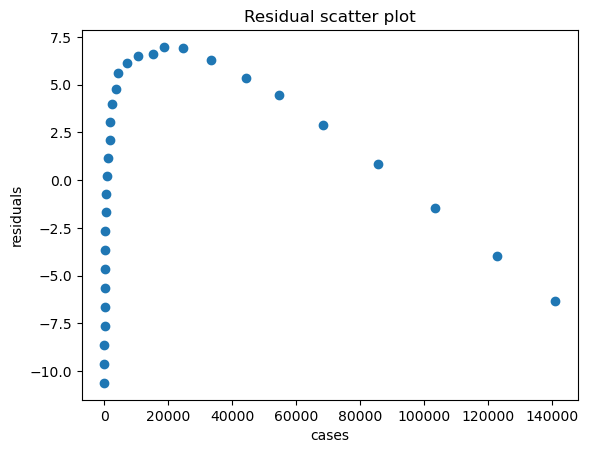

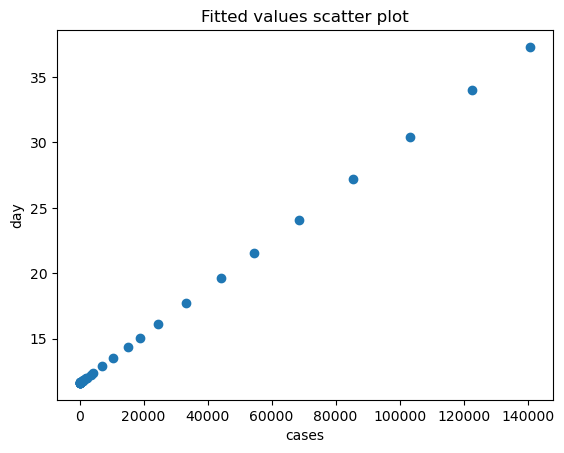

In [7]:
Covid_data = pd.read_csv(r'Assignments\Assignment_6\Covid_Data.csv')
#print(Covid_data.head())
# Residual scatter plot

# data preparation
X = Covid_data[['cases']]
y = Covid_data['day']

# fit the linear regression model
model = LinearRegression().fit(X, y)

# get the predicted values
y_pred = model.predict(X)

# calculate the residuals
residuals = y - y_pred

# plot the residuals
plt.scatter(X, residuals)
plt.title('Residual scatter plot')
plt.xlabel('cases')
plt.ylabel('residuals')
plt.show()

# fitted values scatter plot 

# data preparation
X = Covid_data[['cases']]
y = Covid_data['day']

# fit the linear regression model
model = LinearRegression().fit(X, y)

# get the predicted values
y_pred = model.predict(X)

# plot the fitted values
plt.scatter(X, y_pred)
plt.title('Fitted values scatter plot')
plt.xlabel('cases')
plt.ylabel('day')
plt.show()


(b) Find and interpret the correlation between time and (i) cases, (ii) log(cases).

`Your answer goes here`

In [8]:
# correlation between 'day' and 'cases'
correlation_time_cases = Covid_data['day'].corr(Covid_data['cases'])

# change the'cases' 
Covid_data['log_cases'] = np.log(Covid_data['cases'] + 1)  # Adding 1 to avoid log(0) which is undefined
correlation_time_log_cases = Covid_data['day'].corr(Covid_data['log_cases'])

# printing the results
print(f"correlation between time and cases: {correlation_time_cases:.3f}")
print(f"correlation between time and log(cases): {correlation_time_log_cases:.3f}")

correlation between time and cases: 0.794
correlation between time and log(cases): 0.997


(c)  Fit the linear model for the log-transformed counts and report the prediction equation.$^{29}.$ Explain why the predicted count at day $x+1$ equals the predicted count at day $x$ multiplied by $\text{exp}(\hat\beta_1)=1.36.$

`Your answer goes here`

In [9]:
X = Covid_data[['day']]
y_log_transformed = np.log(Covid_data['cases'] + 1)

model_log = LinearRegression().fit(X, y_log_transformed)

# model prediction equation
beta_0 = model_log.intercept_
beta_1 = model_log.coef_[0]

print(f"Prediction Equation: log(y) = {beta_0:.3f} + {beta_1:.3f}x")

Prediction Equation: log(y) = 2.866 + 0.308x


With the prediction equation from the previous cell:

$ \log(y) = 2.866 + 0.308x $

When we increase $ x $ (day) by 1 unit, the difference in the log-transformed predictions is $ 0.308 $. This can be expressed as:

$ \log(y_{x+1}) - \log(y_x) = 0.308 $

Using the properties of logarithms this is re-written as:

$ \log(y_{x+1}) = \log(y_x) + \log(\exp(0.308)) $

By exponentiating both sides:

$ y_{x+1} = y_x \times \exp(0.308) $


This means that the count at day $ x+1 $ is equal to the count at day $x$ multiplied by $ \exp(0.308) $, which is approximately 1.36. 


## Problem 6.8.

Refer to the example in Section 6.2.5 of the crime rate in Florida counties.

(a) Explain what it means when we say these data exhibit *Simpson’s paradox*. What could cause this change in the direction of the association between crime rate and education
when we adjust for urbanization?

`Your answer goes here`

A possible reason for the change in the direction of the association between the crime rate and the education level when we adjusted for urbanization is that the urbanization level is a confounding variable. The urbanization level is associated with both the crime rate and the education level. When we adjust for the urbanization, we are removing the effect of the urbanization level on the crime rate and the education level. This causes the association frequency and the correlation between the crime rate and the education level to change.

(b) Using the Florida data file, construct the scatterplot between *x* = education (HS) and *y* = income (Income), for which the correlation is 0.79. If we had data at the individual
level as well as aggregated for a county, sketch a scatterplot to show that at that level the correlation could be much weaker. So, predictions about individuals based on the
behavior of aggregate groups, known as the *ecological fallacy*, can be quite misleading.

`Your answer goes here`

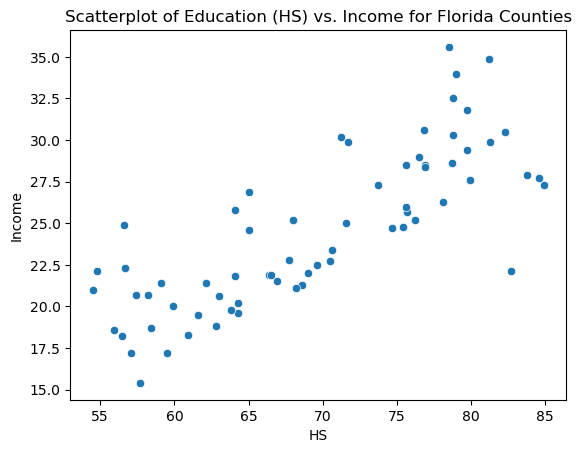

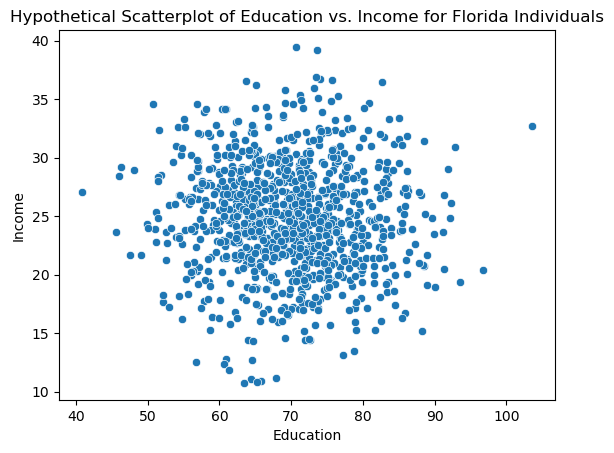

In [10]:
Florida_data = pd.read_csv(r'Assignments\Assignment_6\Florida_Data.csv')

# scatter plot for agg data 
sns.scatterplot(data=Florida_data, x='HS', y='Income')
plt.title('Scatterplot of Education (HS) vs. Income for Florida Counties')
plt.show()

# hypothetical Scatterplot for Individual-Level Data:
np.random.seed(42)
individual_education = np.random.normal(Florida_data['HS'].mean(), Florida_data['HS'].std(), 1000)
individual_income = np.random.normal(Florida_data['Income'].mean(), Florida_data['Income'].std(), 1000)

sns.scatterplot(x=individual_education, y=individual_income)
plt.title('Hypothetical Scatterplot of Education vs. Income for Florida Individuals')
plt.xlabel('Education')
plt.ylabel('Income')
plt.show()

(c) Refer to (b), in which *x* falls between 54.5 and 84.9. Is it sensible to use the least squares line to predict a county’s median income if *x* = 0? Sketch a hypothetical true relationship between *x* and *E(Y)* to show the danger of *extrapolation*, using a fitted line to predict *E(Y)* far from the observed *x* values.

`Your answer goes here`

### No it is not senseable to predict the countrys median income because after linear regression is applied to the observed data, the line will then be extrapolated to predict the median income of the country. Its not a good Idea because if $ x = 0 $ the obsevrved data is between 54.5 and 84.9. 

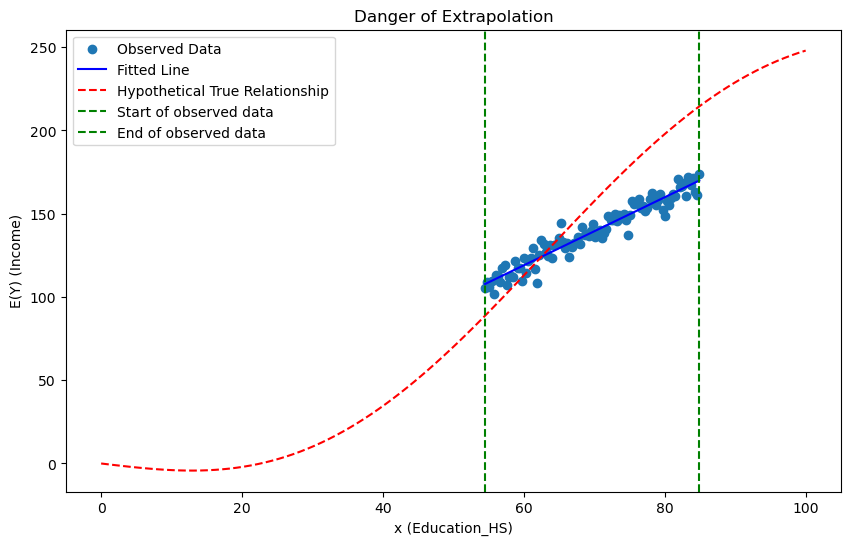

In [11]:
# synthetic data
x = np.linspace(54.5, 84.9, 100)
y = 2*x + np.random.normal(0, 5, 100)

# linear regression
fit = np.polyfit(x, y, 1)
y_fit = fit[0]*x + fit[1]

# hypothetical true relationship data
x_extrapolate = np.linspace(0, 100, 100)
y_true = 2*x_extrapolate - 50*np.sin(0.05*x_extrapolate)  

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Observed Data')
plt.plot(x, y_fit, color='blue', label='Fitted Line')
plt.plot(x_extrapolate, y_true, color='red', linestyle='--', label='Hypothetical True Relationship')
plt.axvline(x=54.5, color='green', linestyle='--', label='Start of observed data')
plt.axvline(x=84.9, color='green', linestyle='--', label='End of observed data')
plt.legend()
plt.title('Danger of Extrapolation')
plt.xlabel('x (Education_HS)')
plt.ylabel('E(Y) (Income)')
plt.show()


## Problem 6.10.

The `Students` data file shows responses on variables summarized in Exercise 1.2.

(a) Fit the linear model using *hsgpa* = high school GPA, *tv* = weekly hours watching TV, and *sport* = weekly hours participating in sports as predictors of *cogpa* = college GPA. Report the prediction equation. What do the *P*-values suggest?

`Your answer goes here`

In [12]:
import statsmodels.api as sm

Students_Data = pd.read_csv(r'Assignments\Assignment_4\Students_data.csv')

# Extract the predictor variables and the target variable
X = Students_Data[['hsgpa', 'tv', 'sport']]
X = sm.add_constant(X)  
y = Students_Data['cogpa']

# Fit the model
model = sm.OLS(y, X).fit()

# Display the summary stats
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  cogpa   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     2.179
Date:                Sun, 15 Oct 2023   Prob (F-statistic):              0.101
Time:                        10:28:17   Log-Likelihood:                -18.587
No. Observations:                  60   AIC:                             45.17
Df Residuals:                      56   BIC:                             53.55
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8154      0.368      7.655      0.0

The Formula for the prediction is: 
$$ cogpa = const + β1 × hsgpa + β2 × tv + β3 × sport $$



Our P-Val is P>|t| in the Printed table 

$ 0.000$ is our constant 

$ 0.044$ is our hsgpa 

$ 0.629$ is our tv 

$ 0.230 $  is our sport 

The P values suggest that the hsgpa is the most significant predictor of cogpa. With that being said, Tv and Sport, arent significant predictors of cogpa.

(b)  Summarize the estimated effect of *hsgpa.*

`Your answer goes here`

High School Grade Point Average 

The high School Grade point average is the highest or the best predictor of College Grade Point Average. 

With that being said lets break down the facts

1. The P value is 0.044 which is less than 0.05. This means that the high school grade point average is a significant predictor of the college grade point average.

2. The Coefficient is 0.2088 which is positive. This means that the high school grade point average is positively associated with the college grade point average.

The P-Val being way below the 5% threshold means that the high school grade point average is a significant predictor of the college grade point average.

(c) Report and interpret $R^2$, adjusted $R^2$, and the multiple correlation.

`Your answer goes here`

$R^2$: It Represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It best represents the strength of the relationship. A higher $R^2$ value means a better between the dependent and independent variables, and the predictability of the model. 

Adjusted $R^2$: Accounts for the number of predictors in the model. Adjusted $R^2$ only increases if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance. It is always lower than $R^2$. It provides a better measure than the non-adjusted $R^2$ when comparing models that have a different number of predictors.

Multiple Correlation: The correlation between the observed values of the dependent variable and the values predicted by the regression model. It is the square root of $R^2$. The closer that the multiple correlation is closer to $1$, the better the model fits the data. 

## Problem 6.11.

Refer to the model fitted in the previous exercise to predict college GPA.

(a) Test $H_0:\beta_1 = \beta_2 = \beta_3 =0.$ Report the *P*-value and interpret.

`Your answer goes here`

In [13]:
X = Students_Data[['hsgpa', 'tv', 'sport']]
X = sm.add_constant(X)

y = Students_Data['cogpa']

# fit the regression model
model = sm.OLS(y, X).fit()

# summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  cogpa   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     2.179
Date:                Sun, 15 Oct 2023   Prob (F-statistic):              0.101
Time:                        10:28:17   Log-Likelihood:                -18.587
No. Observations:                  60   AIC:                             45.17
Df Residuals:                      56   BIC:                             53.55
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8154      0.368      7.655      0.0

### $H_0:\beta_1 = \beta_2 = \beta_3 =0.$

F-Statisic: = 2.179 

Prob F-Statisic: = 0.101 

The stats show that the HSGPA, TV, and Sport are not significant predictors of the College GPA, and we reject the null hypothesis. The alternative hypothesis is that at least one of the predictors is a significant predictor of the College GPA, which is showing that the HSGPA is the only significant predictor of the College GPA, at the P value of 0.044.

(b) Show how to conduct a significance test about the individual effect of hsgpa, adjusting for tv and sport, using $\alpha = 0.05$. Interpret.

`Your answer goes here`

#### T- Value:  2.061 
#### P>|T|: 0.044

We are able to see that the P value is less that 0.05, which means that the HSGPA is a significant predictor of the College GPA. 

(c)  Is the effect in (b) significant at the $\alpha = 0.05$ level if we use the Bonferroni approach to test the family of three individual effects? Explain.

`Your answer goes here`

The effect that HSGPA has on COGPA is not significant at the 0.05 level if we use the Bonferroni approach to test the family of three individual effects. This is because the Bonferroni approach divides the significance level by the number of tests. This means that when we account for the 3 tests, the evidence can't or is not strong enough to reject the Null. 

(d) Are the effects of *tv* and *sport* significant? Propose an alternative model.

`Your answer goes here`

Given that the P values were higher, I think with that being said, there should be a change in the model. Given that the Pvalues are higher than the HSGPA, I think that the model should be changed to only include the HSGPA as a predictor of the COGPA, since the other predictors are not significant for the model. 

## Problem 6.12.

For the `UN` data file at the book’s website (see Exercise 1.24), construct a multiple regression model predicting Internet using all the other variables. Use the concept of multicollinearity to explain why adjusted $R^2$ is not dramatically greater than when GDP is the sole predictor. Compare the estimated GDP effect in the bivariate model and the multiple regression model and explain why it is so much weaker in the multiple regression model.

`Your answer goes here`

In [14]:
Un_data = pd.read_csv(r'Assignments\Assignment_6\UN_data.csv')

# Dependent variable
y = Un_data['Internet']

# Independent variables (excluding 'Nation' and 'Internet')
X = Un_data[['GDP', 'HDI', 'GII', 'Fertility', 'CO2', 'Homicide', 'Prison']]
X = sm.add_constant(X)

# Fit the model
model_multi = sm.OLS(y, X).fit()
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:               Internet   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     27.04
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           3.95e-12
Time:                        10:28:17   Log-Likelihood:                -154.04
No. Observations:                  42   AIC:                             324.1
Df Residuals:                      34   BIC:                             338.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1583     38.773      0.288      0.7

In [15]:
# Independent variable (only 'GDP')
X_bivariate = sm.add_constant(Un_data['GDP'])

# Fit the model
model_bivariate = sm.OLS(y, X_bivariate).fit()
print(model_bivariate.summary())

                            OLS Regression Results                            
Dep. Variable:               Internet   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     133.5
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           2.55e-14
Time:                        10:28:17   Log-Likelihood:                -162.74
No. Observations:                  42   AIC:                             329.5
Df Residuals:                      40   BIC:                             333.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.1341      3.749      6.971      0.0

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

    Variable         VIF
0      const  569.419104
1        GDP    7.344154
2        HDI   10.839134
3        GII    7.157718
4  Fertility    2.192998
5        CO2    2.589220
6   Homicide    1.471826
7     Prison    1.924542


Using just GDP: When we just look at GDP, it seems to be a strong predictor of Internet usage. When a nation's GDP goes up, their Internet usage goes up significantly.

Using multiple factors: When we include more factors, the effect of GDP gets smaller and is no longer significant. This means that other factors are also playing a role. Specifically, GII (Gender Inequality Index) is significant and suggests that countries with more gender inequality tend to have less Internet usage.

Multicollinearity: Some of our variables, like HDI, are influenced by other variables in our model. This can make it hard to pinpoint the exact effect of each variable.

Why GDP weaker in the multiple regression: It's likely because when we consider more variables, the unique effect of GDP gets diluted. Other variables might be capturing similar information about a country's development and Internet usage as GDP does.


The VIF for GDP is 7.344154, which is a sign that GDP is moderately correlated with other predictors in the model. This multicollinearity can lead to unstable and weaker coefficients.GDP is not acting alone therefore its effect is intertwined with the effects of other variables.

## Problem 7.1.

For the `Houses` data file described in Section 7.1.3, consider $Y$ = selling price, $x_1$ = tax bill (in dollars), and $x_2$ = whether the house is new.

(a) Form the scatterplot of $y$ and $x_1$. Does the normal GLM structure of constant variability in $y$ seem approproate? If not, how does it seem to be violated?

`Your answer goes here`

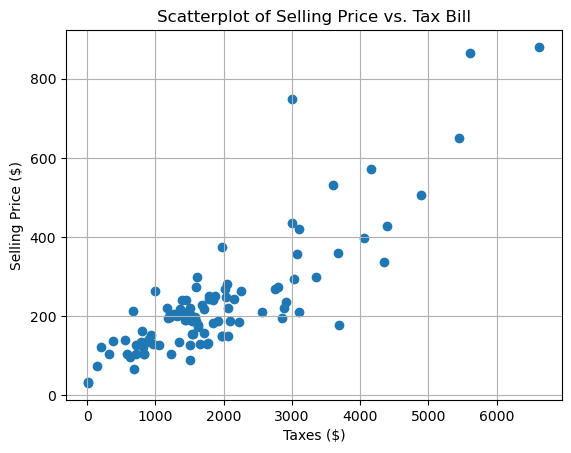

In [17]:
House_data = pd.read_csv(r'Assignments\Assignment_4\House_Data.csv')
#House_data.head()

plt.scatter(House_data['taxes'], House_data['price'])
plt.xlabel('Taxes ($)')
plt.ylabel('Selling Price ($)')
plt.title('Scatterplot of Selling Price vs. Tax Bill')
plt.grid(True)
plt.show()

Yes it seems to be appropriate. The variability in the data seems to be constant.

(b) Using the identity link function, fit the (i) normal GLM, (ii) gamma GLM. For each model, interpret the effect of $x_2$.

`Your answer goes here`

In [18]:
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Gaussian

# Assuming your dataframe is named 'House_data' and 'new' is a binary column indicating if the house is new
X = House_data[['taxes', 'new']]  
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = House_data['price']

# Fit normal GLM with identity link
model_normal = GLM(y, X, family=Gaussian(link=sm.families.links.identity()))
result_normal = model_normal.fit()
print(result_normal.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                          6212.7
Method:                          IRLS   Log-Likelihood:                -577.09
Date:                Sun, 15 Oct 2023   Deviance:                   6.0264e+05
Time:                        10:28:17   Pearson chi2:                 6.03e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9333
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.9651     14.695      2.856      0.0

c:\Users\user\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [19]:
from statsmodels.genmod.families import Gamma

# Fit gamma GLM with identity link
model_gamma = GLM(y, X, family=Gamma(link=sm.families.links.identity()))
result_gamma = model_gamma.fit()
print(result_gamma.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                   Gamma   Df Model:                            2
Link Function:               identity   Scale:                        0.087318
Method:                          IRLS   Log-Likelihood:                -549.36
Date:                Sun, 15 Oct 2023   Deviance:                       8.6477
Time:                        10:28:17   Pearson chi2:                     8.47
No. Iterations:                    14   Pseudo R-squ. (CS):             0.9306
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.2225      7.837      8.068      0.0

c:\Users\user\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:307: DomainWarning: The identity link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


(c) For each model, describe how the estimated variability in selling prices varies as the mean selling price varies from 100 thousand to 500 thousand dollars.

`Your answer goes here`

(d) Which model is preferred according to AIC?

`Your answer goes here`

## Problem 7.5.

A study of sheep mentioned in Exercise 1.27 analyzed whether the sheep survived for a year from the original observation time (1 = yes, 0 = no) as a function of their weight (*kg*) at the original observation.

(a) Does the survival of the sheep seem to depend on their weight? If so, how does the weight of a sheep affect its probability of survival? Answer by fitting a generalized linear model for the survival probability.

`Your answer goes here`

In [21]:
Sheep_Data = pd.read_csv(r'Assignments\Assignment_5\Sheep_Data.csv') 

# adding a constant (intercept) to our model
Sheep_Data['intercept'] = 1

# define predictors and response
X = Sheep_Data[['intercept', 'weight']]
y = Sheep_Data['survival']

# fitting the log regression model
model = sm.GLM(y, X, family=sm.families.Binomial())
result = model.fit()

# Print results
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               survival   No. Observations:                 1359
Model:                            GLM   Df Residuals:                     1357
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -645.22
Date:                Sun, 15 Oct 2023   Deviance:                       1290.4
Time:                        10:29:06   Pearson chi2:                 1.44e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1294
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0298      0.251     -8.103      0.0

(b)  For what weight values do the sheep have more than a 50% chance of survival?

`Your answer goes here`

Given the logistic regression model results, we have:

$$ \ln\left(\frac{p}{1-p}\right) = -2.0298 + 0.1755 \times \text{weight} $$

Where $ p $ represents the probability of survival.

To find out the weight at which the probability of survival $ p $ exceeds 0.5, we equate the odds ratio $ \frac{p}{1-p} $ to 1 since when $ p = 0.5 $, the odds ratio is $ \frac{0.5}{0.5} = 1 $). Taking the natural log of 1 results in 0. 

            Given this, we can set up our equation as:

$$ -2.0298 + 0.1755 \times \text{weight} = 0 $$

            Solving for weight:

$$ \text{weight} = \frac{2.0298}{0.1755} $$

            This gives:

$$ \text{weight} \approx 11.55 $$

With that being said, sheep that weigh approximately 11.55 kg or more have a probability of survival greater than 50%.


## Problem 7.9.

The `SoreThroat` data file at the book’s website contains data from from a study$^{23}$ about *Y* = whether a patient having surgery had a sore throat on waking (1 = yes, 0 = no) as a function of *D* = duration of the surgery (in minutes) and *T* = type of device used to secure the airway (1 = tracheal tube, 0 = laryngeal mask airway).

(a) Fit a GLM using both explanatory variables as main effects. Interpret effects.

`Your answer goes here`

In [25]:
import statsmodels.api as sm


Sore_data = pd.read_csv(r'Assignments\Assignment_6\Sore_Data.csv')

model = sm.GLM.from_formula("Y ~ D + T", data=Sore_data, family=sm.families.Binomial())

results = model.fit()

# getting the stats
summary = results.summary()
print(summary)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   35
Model:                            GLM   Df Residuals:                       32
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15.069
Date:                Sun, 15 Oct 2023   Deviance:                       30.138
Time:                        10:37:14   Pearson chi2:                     37.0
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3677
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4173      1.095     -1.295      0.1

(b) Fit a GLM permitting interaction between the explanatory variables. Interpret the effect of *D* at each category of *T*.

`Your answer goes here`

In [27]:
model_with_interaction = sm.GLM.from_formula("Y ~ D * T", data=Sore_data, family=sm.families.Binomial())
results_interaction = model_with_interaction.fit()
summary_interaction = results_interaction.summary()

# printing the interaction 
print(summary_interaction)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   35
Model:                            GLM   Df Residuals:                       31
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14.161
Date:                Sun, 15 Oct 2023   Deviance:                       28.321
Time:                        10:38:56   Pearson chi2:                     28.6
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3997
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0498      1.469      0.034      0.9

&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;


----------------
$^{23}$ Described in “Binary Data” by D. Collett, *Encyclopedia of Biostatistics*, 2nd ed. (Wiley, 2005), pp. 439–446.

$^{29}$ Some lack of fit the last few days reflects the impact of increasing “social distancing.”